# Siyu Mao
# ISE 529 hw4

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Question1

In [95]:
hitters = pd.read_csv('Hitters.csv')

In [96]:
len(hitters)

322

In [97]:
len(hitters[hitters['Salary'].isnull() == True])

59

In [98]:
df = hitters[hitters['Salary'].isnull() == False]
len(df)

263

In [99]:
df[:5]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [100]:
X = df.drop(['Salary'], axis = 1)
X[['League','Division','NewLeague']] = pd.get_dummies(X[['League','Division','NewLeague']],drop_first=True)
y = df.Salary

In [101]:
# a)

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5,
                                                test_size = 0.50,random_state=0)

In [103]:
bagged = RandomForestRegressor(max_features=10, n_estimators=100, random_state=1)
bagged.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [104]:
pred = bagged.predict(X_test)

In [105]:
mean_squared_error(y_test, pred)

90143.64631666582

In [106]:
# The MSE value is 90143.64631666582.

In [107]:
Importance = pd.DataFrame({'Importance': bagged.feature_importances_*100}, 
                         index=X.columns)
Importance

,Importance
AtBat,6.063471
Hits,4.825391
HmRun,2.515385
Runs,5.490423
RBI,4.479702
Walks,10.042096
Years,1.099970
CAtBat,7.046038
CHits,14.085526
CHmRun,2.306548


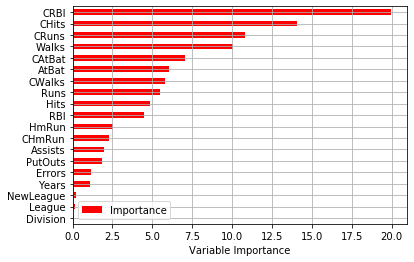

In [108]:
Importance.sort_values(by='Importance', axis = 0, ascending = True)\
                        .plot(kind = 'barh', color='r',)
plt.xlabel('Variable Importance')
plt.gca.legend_ = None
plt.grid()

In [109]:
# According to the plot, the most important predictors
# are CRBI, CHits, CRuns, Walks.

In [110]:
# b)

In [111]:
boosted_df1 = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 4,
                                       random_state = 1)
boosted_df1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [112]:
importance = boosted_df1.feature_importances_*100

In [113]:
rel_imp = pd.DataFrame({'Importance': importance}, index = X.columns)
rel_imp

,Importance
AtBat,4.753850
Hits,6.084695
HmRun,0.111634
Runs,4.458109
RBI,4.136193
Walks,14.172933
Years,1.775501
CAtBat,7.250907
CHits,2.784121
CHmRun,1.204371


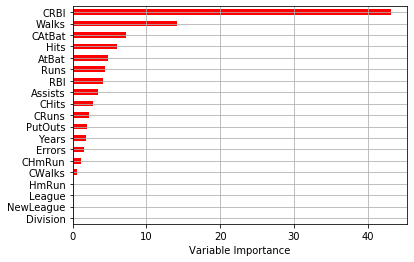

In [114]:
rel_imp.sort_values(by = 'Importance', axis = 0, ascending = True). plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

In [115]:
# According to the plot, the most important predictor
# is CRBI, Walks, CAtBat.

In [116]:
mean_squared_error(y_test, boosted_df1.predict(X_test))

96344.8969470074

In [117]:
# The MSE value is 96344.8969470074.

In [134]:
# c)
len(X)

263

In [128]:
X = df[['CRBI', 'CHits', 'CRuns', 'Walks']]
y = y.values.reshape(-1,1)
x_train, y_train, x_test, y_test = train_test_split(X,y,train_size=0.5,
                                                test_size = 0.50,random_state=0)
x_train

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [121]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [131, 132]

In [29]:
reg.coef_

array([-1.51427238e-03,  1.82135198e-02,  7.30485392e-01,  4.70093000e+00])

In [30]:
reg.intercept_

77.07486465748434

In [31]:
pred2 = reg.predict(X_test[['CRBI', 'CHits', 'CRuns', 'Walks']])

In [32]:
mean_squared_error(y_test, pred2)

145138.89788196175

In [33]:
# The test MSE is 145138.89788196175.


# Question2

In [34]:
df = pd.read_csv('bodyfat.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
skinfold    20 non-null float64
thigh       20 non-null float64
midarm      20 non-null float64
bodyfat     20 non-null float64
dtypes: float64(4)
memory usage: 720.0 bytes


In [36]:
X = df.drop(['bodyfat'], axis = 1)
y = df.bodyfat

In [37]:
X

,skinfold,thigh,midarm
0,19.5,43.1,29.1
1,24.7,49.8,28.2
2,30.7,51.9,37.0
3,29.8,54.3,31.1
4,19.1,42.2,30.9
5,25.6,53.9,23.7
6,31.4,58.5,27.6
7,27.9,52.1,30.6
8,22.1,49.9,23.2
9,25.5,53.5,24.8


In [38]:
# a)

In [39]:
x = X.drop(['midarm'], axis = 1)
y1 = X.midarm

In [40]:
list =['skinfold', 'thigh', 'midarm']
xz = X[list]
xz.corr()

,skinfold,thigh,midarm
skinfold,1.000000,0.923843,0.457777
thigh,0.923843,1.000000,0.084667
midarm,0.457777,0.084667,1.000000


In [41]:
# The predictors show low correlation is thigh with midarm and
# midarm with skinfold.

In [42]:
m = LinearRegression().fit(x, y1)
MSE = mean_squared_error(y1, m.predict(x))
SSE = MSE * len(y1)
R_squared = m.score(x, y1)

In [43]:
R_squared

0.9904403193686466

In [44]:
# The R^2 value is 0.9904403193686466.

In [45]:
# Since the R^2 is very closet to 1. We can say midarm 
# circumference linearly related to the other predictors.

In [46]:
# b)

In [47]:
corr_new = xz.corr().to_numpy()

In [48]:
alphas = np.arange(0.01, 1, 0.01)
VIF = np.array([np.diag(np.linalg.inv(corr_new + i * np.identity(3))@corr_new@
                       np.linalg.inv(corr_new + i * np.identity(3)))
               for i in alphas])

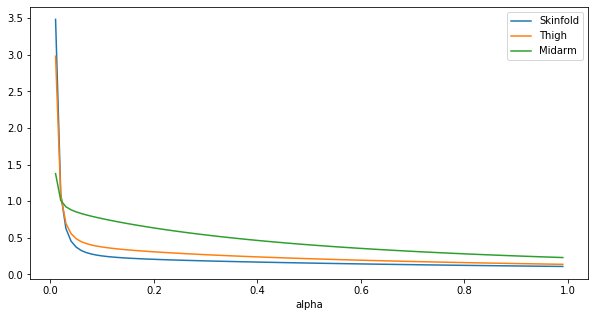

In [49]:
plt.figure(figsize=(10,5))
plt.plot(alphas, VIF[:,0], label = 'Skinfold')
plt.plot(alphas, VIF[:,1], label = 'Thigh')
plt.plot(alphas, VIF[:,2], label = 'Midarm')
plt.xlabel('alpha')
plt.legend()

# Question3

In [50]:
df = pd.read_csv('Caravan.csv')

In [51]:
df[['Purchase']] = pd.get_dummies(df[['Purchase']],drop_first=True)

In [52]:
x3 = df.drop(['Purchase'], axis = 1)
y3 = df.Purchase

In [53]:
x_train = x3[:1000]
y_train = y3[:1000]

In [54]:
x_test = x3[1000:]
y_test = y3[1000:]

In [55]:
# a)

In [56]:
df['PVRAAUT'].value_counts()

0    5813
6       7
9       1
4       1
Name: PVRAAUT, dtype: int64

In [57]:
df['AVRAAUT'].value_counts()

0    5813
1       6
2       2
3       1
Name: AVRAAUT, dtype: int64

In [58]:
df = df.drop(['PVRAAUT', 'AVRAAUT'], axis=1)
x3 = df.drop(['Purchase'], axis = 1)
y3 = df.Purchase
x_train = x3[:1000]
y_train = y3[:1000]
x_test = x3[1000:]
y_test = y3[1000:]

In [59]:
# b)

In [60]:
random_forest = RandomForestClassifier(max_features = 29,
                                     n_estimators = 500,
                                     random_state = 1)
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=29, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [61]:
# test MSE

In [62]:
pred = random_forest.predict(x_test)
mean_squared_error(y_test,pred)

0.06822895064288677

In [63]:
# Test MSE is 0.06822895064288677.

In [64]:
importance = random_forest.feature_importances_*100
imp = pd.DataFrame({'Importance': importance}, index = x3.columns)
imp.sort_values('Importance', ascending = False)

,Importance
PPERSAUT,3.426791
MOSTYPE,3.333823
MGODGE,3.302695
MOPLHOOG,3.024537
PBRAND,2.804189
MGODPR,2.659090
MKOOPKLA,2.606417
ABRAND,2.326212
MBERMIDD,2.311773
MFWEKIND,2.250384


<Figure size 2880x1440 with 0 Axes>

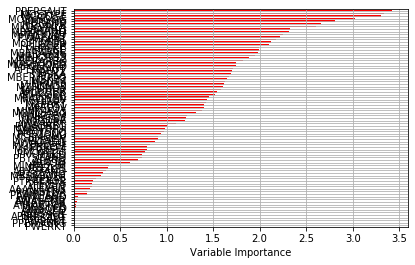

In [65]:
plt.figure(figsize=(40,20))
imp.sort_values(by = 'Importance', axis = 0, ascending = True). plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

In [66]:
# The predictor appears  to be the most important is PPERSAUT.

In [67]:
pred = random_forest.predict(x_test)
pred = np.round(pred) 
mat = confusion_matrix(y_test, pred)

In [68]:
cm = pd.DataFrame(mat,index = ['No','Yes'],columns = ['No','Yes'])
cm

,No,Yes
No,4481,52
Yes,277,12


In [69]:
sum1 = cm.values.sum()
(4481+12)/sum1

0.9317710493571132

In [70]:
# The test accuracy rate is 0.9317710493571132.

In [71]:
# c)

In [72]:
boosted = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.01,
                                          max_depth = 4, random_state =1)
boosted.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [73]:
importance = boosted.feature_importances_*100

In [74]:
imp_3 = pd.DataFrame({'Importance': importance}, index = x3.columns)
imp_3.sort_values('Importance', ascending = False)

,Importance
PPERSAUT,6.745348
MOSTYPE,5.662854
MOPLHOOG,4.882570
MGODGE,4.870206
ABRAND,4.500669
MKOOPKLA,4.463208
MGODPR,4.301484
MBERMIDD,3.768220
PWAPART,2.809727
AMOTSCO,2.797485


In [75]:
# The most important predictor is PPERSAUT.

In [76]:
pred1 = boosted.predict(x_test)
pred1 = np.round(pred1) 
mat1 = confusion_matrix(y_test, pred1)
mat1

array([[4489,   44],
       [ 277,   12]], dtype=int64)

In [77]:
cm1 = pd.DataFrame(mat1,index = ['No','Yes'],columns = ['No','Yes'])
cm1

,No,Yes
No,4489,44
Yes,277,12


In [78]:
sum2 = cm.values.sum()
(4489+12)/sum2

0.9334301119867275

In [79]:
# The test accuracy rate is 0.9334301119867275.

In [80]:
# d)

In [81]:
model = KNeighborsClassifier(n_neighbors=3)

In [82]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [83]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [84]:
model.score(x_test, y_test)

0.9276233927830776

In [85]:
# The test accuracy rate is 0.9276233927830776.

In [86]:
# e)

In [90]:
model1 = LogisticRegression(solver='lbfgs', max_iter = 1000, random_state = 1)
model1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
model1.score(x_test, y_test)

0.9346744089589382

In [92]:
# The test accuracy rate is 0.9346744089589382.